In [ ]:
// moved from root/Assignment_2/redesign assignment2.ipynb
{
    "cells": [
        {
            "cell_type": "markdown",
            "id": "#VSC-62239b90",
            "metadata": {
                "language": "markdown"
            },
            "source": [
                "## Assignment 2 - Redesign of Nightingale's Rose Diagram",
                "---",
                "Name: Richard Pears",
                "",
                "Student ID: 100063807",
                ""
            ]
        },
        {
            "cell_type": "markdown",
            "id": "#VSC-80853a50",
            "metadata": {
                "language": "markdown"
            },
            "source": [
                "Original Graphic",
                "----------------",
                "![Original Graphic](image.png)"
            ]
        },
        {
            "cell_type": "markdown",
            "id": "#VSC-d890388c",
            "metadata": {
                "language": "markdown"
            },
            "source": [
                "",
                "### Points in the diagram:",
                "",
                "- The Areas of the blue, red, & black wedges are each measured from the centre as the common vertex.",
                "",
                "- The blue wedges: measured from the centre of the circle represent area for area the deaths from Preventible or Mitigable Lymotic diseases; the red wedges measured from the centre the deaths from wounds; & the black wedges measured from the centre the deaths from all other causes.",
                "",
                "- The black line across the red triangle in Nov 1851 marks the boundary of the deaths from all other causes during the month.",
                "",
                "- In October 1854, 8 April 1855; the black area coincides with the red; in January & February 1855, the blue coincides with the black.",
                "",
                "- The entire areas may be compared by following the blue the red & the black lines enclosing them.",
                "",
                "--- ",
                "",
                "## Understanding the original graphic",
                "",
                "The diagram shows the number of deaths in the crimean war by month and the cause of death (disease, wounds and other). Each wedge represents a month, and the area of the wedge is proportional to the number of deaths from each cause. The diagram shows that the majority of deaths were from disease rather than wounds and other causes. Florence Nightingale used this diagram to advocate for improved sanitation in military hospitals, which she believed would reduce the number of unnecessary deaths from disease.",
                "",
                "",
                "The graphic shows two polar plots, the one on the right starting from April 1854 to March 1855, and then continuing the same radial plot on the left from April 1855 to March 1856. This showcases the issue that she was tring to highlight, but polar charts can be hard to interpret cause they dont have a common baseline and the area of the wedges can be hard to compare",
                ""
            ]
        },
        {
            "cell_type": "markdown",
            "id": "#VSC-e6038f1d",
            "metadata": {
                "language": "markdown"
            },
            "source": [
                "### Isues with interpreting the original graphic",
                "",
                "- The radial layout makes it hard to compare values across months because the visual perception of area is less intuitive than a linear chart",
                "- She does mention that the black line across the red triangle in Nov 1854 marks the boundary of the deaths from all other causes during the month, but this is hard to interpret in the polar chart format.",
                "",
                "- the graphic's static nature lacks interactivity, limiting exploration of deaths vs. rates or specific months",
                "",
                "### Redesign Concept",
                "",
                "- I have decided to redesign the graphic using a stacked bar chart with dual y axes to represent both the number of deaths and death rates over time",
                "",
                "- The stacked bar chart will allow for easier comparison of the number of deaths from different causes across months, while the dual y axes will enable viewers to see both the absolute number of deaths and the death rates simultaneously.",
                "",
                "- I have also chosen to maintain the same color scheme used by Nightingale (blue for disease, red for wounds, and grey for other causes) to preserve the original intent and visual identity of the graphic",
                ""
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-11ef5a46",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# adding necessary imports",
                "import pandas as pd",
                "import matplotlib.pyplot as plt",
                "import seaborn as sns",
                "import plotly.graph_objects as go",
                ""
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-85a9aedf",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# inspecting the data",
                "df = pd.read_excel(\"data/nightingale.xlsx\")",
                "df"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-b4db3d2c",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# getting summary statistics",
                "df.describe()"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-fd7c70c2",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# date formatting and creating Month_Year column",
                "df['Date'] = pd.to_datetime(df['Date']).dt.date",
                "df[\"Month_Year\"] = df[\"Month\"] + \" \" + df[\"Year\"].astype(str)",
                "",
                "df.head()"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-1c14e0f5",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# line graph of army and total deaths",
                "# inspecting the relationship between army size and total deaths over time",
                "df['Total Deaths'] = df['Disease'] + df['Wounds'] + df['Other']",
                "plt.figure(figsize=(12, 6))",
                "sns.lineplot(data=df, x='Month_Year', y='Total Deaths', marker='o', label='Total Deaths', color='blue')",
                "sns.lineplot(data=df, x='Month_Year', y='Army', marker='o', label='Army', color='orange')",
                "plt.xticks(rotation=45)",
                "plt.title('Total Deaths vs Army Over Time')",
                "plt.xlabel('Month and Year')",
                "plt.ylabel('Number of Deaths / Army Size')",
                "plt.legend()",
                "plt.tight_layout()",
                "plt.show()"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-03ca920a",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# adding a stacked bar chart and maintaining the same color scheme used by Nightingale",
                "",
                "df.set_index('Month_Year')[['Disease', 'Wounds', 'Other']].plot(kind='bar', stacked=True, figsize=(14, 8),",
                "                                                                 color=['skyblue', 'salmon', 'grey'])",
                "plt.ylabel('Number of Deaths')",
                "plt.xlabel('Month and Year')",
                "plt.legend(title='Cause of Death')",
                "plt.xticks(rotation=45)",
                "plt.tight_layout()",
                "plt.show()"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-6d93b4c4",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# Redesigned graphic of Nightingale's data using matplotlib",
                "# adding a dual axis line plot for the death rates alonside the stacked bar chart",
                "# creating fix and axes for the combined plot",
                "fig, ax1 = plt.subplots(figsize=(18, 10))",
                "",
                "# plot for the stacked bar chart using plot from pandas",
                "df.set_index(\"Month_Year\")[[\"Disease\", \"Wounds\", \"Other\"]].plot(",
                "    kind=\"bar\",",
                "    stacked=True,",
                "    ax=ax1,",
                "    color=[\"skyblue\", \"salmon\", \"grey\"],",
                "    edgecolor=\"black\",",
                ")",
                "ax1.set_title('Diagram of the causes of mortality in the army in the east', fontsize=22)",
                "ax1.set_ylabel('Number of Deaths', fontsize=12)",
                "ax1.set_xlabel('Month and Year', fontsize=12)",
                "ax1.tick_params(axis='x', rotation=45)",
                "ax1.legend(title='Cause of Death', loc='upper left')",
                "",
                "# secondary axis for the death rates ",
                "ax2 = ax1.twinx()",
                "ax2.plot(df[\"Month_Year\"],df[\"Disease.rate\"],color=\"skyblue\",marker=\"o\",label=\"Disease Rate\",markersize=8)",
                "ax2.plot(df['Month_Year'], df['Wounds.rate'], color='salmon', marker='o', label='Wounds Rate',markersize=8)",
                "ax2.plot(df['Month_Year'], df['Other.rate'], color='grey', marker='o', label='Other Rate',markersize=8)",
                "ax2.set_ylabel('Death Rates (per 1,000)', fontsize=12)",
                "ax2.legend(title='Death Rates', loc='upper right')",
                "",
                "",
                "plt.tight_layout()",
                "plt.show()"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-d593ce56",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# Redesigned graphic of Nightingale's data using plotly ",
                "# figure object for the combined plot",
                "fig = go.Figure()",
                "",
                "# Add stacked bar traces for the number of deaths",
                "fig.add_trace(go.Bar(x=df['Month_Year'],y=df['Disease'],name='Disease',marker=dict(color='skyblue', line=dict(color='black', width=1)),yaxis='y1'))",
                "fig.add_trace(go.Bar(x=df['Month_Year'],y=df['Wounds'],name='Wounds',marker=dict(color='salmon', line=dict(color='black', width=1)),yaxis='y1'))",
                "fig.add_trace(go.Bar(x=df['Month_Year'],y=df['Other'],name='Other',marker=dict(color='darkgrey', line=dict(color='black', width=1)),yaxis='y1'))",
                "",
                "# Add line traces for the death rates",
                "fig.add_trace(go.Scatter(x=df['Month_Year'],y=df['Disease.rate'],mode='lines+markers',name='Disease Rate',",
                "                         line=dict(color='skyblue'),marker=dict(color='skyblue'),yaxis='y2' ))",
                "",
                "fig.add_trace(go.Scatter(x=df['Month_Year'],y=df['Wounds.rate'],mode='lines+markers',name='Wounds Rate',",
                "                         line=dict(color='salmon'),marker=dict(color='salmon'),yaxis='y2' ))",
                "",
                "fig.add_trace(go.Scatter(x=df['Month_Year'],y=df['Other.rate'],mode='lines+markers',name='Other Rate',",
                "                         line=dict(color='darkgrey'),marker=dict(color='darkgrey'),yaxis='y2' ))",
                "",
                "",
                "",
                "fig.update_layout(",
                "title=\"Diagram of the causes of mortality in the army in the east\",",
                "xaxis=dict(title=\"Month and Year\", tickangle=45),",
                "yaxis=dict(title=dict(text=\"Number of Deaths\", font=dict(color=\"black\")), side=\"left\"),",
                "yaxis2=dict(title=dict(text=\"Death Rates (per 1000)\", font=dict(color=\"black\")),overlaying=\"y\",side=\"right\",),",
                "    barmode=\"stack\",legend=dict(title=\"Legend\",orientation=\"h\", y=-0.2, x=0.5, xanchor=\"center\"),",
                "    template=\"plotly_white\",height=700,width=1200)",
                "",
                "",
                ""
            ]
        },
        {
            "cell_type": "markdown",
            "id": "#VSC-0da1ddf8",
            "metadata": {
                "language": "markdown"
            },
            "source": [
                "# Notes & summary of redesign",
                "",
                "- I initially tried to redesign the graphic using a polar chart to show the data for all years in a single chart, but its hard to interpret and compare values across months in this format. Also the orgiginal graphic was split into two polar charts which makes sense because its hard to fit all the data into a single polar chart without it looking cluttered.",
                "",
                "- The issue with using a polar char is that it is hard to compare values across months that are across three years. This was the primary reason for switching to a stacked bar chart with a dual y axis. This also makes it easier to follow the trends over time. From a visual standpoint, the stacked bar chart is easier to interpret and compare values across months.",
                "",
                "- I added a graph to show the army size over time to provide context for the death rates, which was missing in the original graphic. The size of the army can significantly impact death rates, so including this information helps viewers understand the data better."
            ]
        }
    ]
}

## Assignment 2 - Redesign of Nightingale's Rose Diagram
---
Name: Richard Pears

Student ID: 100063807


Original Graphic
----------------
![Original Graphic](image.png)


### Points in the diagram:

- The Areas of the blue, red, & black wedges are each measured from the centre as the common vertex.

- The blue wedges: measured from the centre of the circle represent area for area the deaths from Preventible or Mitigable Lymotic diseases; the red wedges measured from the centre the deaths from wounds; & the black wedges measured from the centre the deaths from all other causes.

- The black line across the red triangle in Nov 1851 marks the boundary of the deaths from all other causes during the month.

- In October 1854, 8 April 1855; the black area coincides with the red; in January & February 1855, the blue coincides with the black.

- The entire areas may be compared by following the blue the red & the black lines enclosing them.

--- 

## Understanding the original graphic

The diagram shows the number of deaths in the crimean war by month and the cause of death (disease, wounds and other). Each wedge represents a month, and the area of the wedge is proportional to the number of deaths from each cause. The diagram shows that the majority of deaths were from disease rather than wounds and other causes. Florence Nightingale used this diagram to advocate for improved sanitation in military hospitals, which she believed would reduce the number of unnecessary deaths from disease.


The graphic shows two polar plots, the one on the right starting from April 1854 to March 1855, and then continuing the same radial plot on the left from April 1855 to March 1856. This showcases the issue that she was tring to highlight, but polar charts can be hard to interpret cause they dont have a common baseline and the area of the wedges can be hard to compare


### Isues with interpreting the original graphic

- The radial layout makes it hard to compare values across months because the visual perception of area is less intuitive than a linear chart
- She does mention that the black line across the red triangle in Nov 1854 marks the boundary of the deaths from all other causes during the month, but this is hard to interpret in the polar chart format.

- the graphic's static nature lacks interactivity, limiting exploration of deaths vs. rates or specific months

### Redesign Concept

- I have decided to redesign the graphic using a stacked bar chart with dual y axes to represent both the number of deaths and death rates over time

- The stacked bar chart will allow for easier comparison of the number of deaths from different causes across months, while the dual y axes will enable viewers to see both the absolute number of deaths and the death rates simultaneously.

- I have also chosen to maintain the same color scheme used by Nightingale (blue for disease, red for wounds, and grey for other causes) to preserve the original intent and visual identity of the graphic


In [1]:
# adding necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [2]:
# inspecting the data
df = pd.read_excel("data/nightingale.xlsx")
df

,Unnamed: 0,Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate
0,1,1854-04-01,Apr,1854,8571,1,0,5,1.4,0.0,7.0
1,2,1854-05-01,May,1854,23333,12,0,9,6.2,0.0,4.6
2,3,1854-06-01,Jun,1854,28333,11,0,6,4.7,0.0,2.5
3,4,1854-07-01,Jul,1854,28722,359,0,23,150.0,0.0,9.6
4,5,1854-08-01,Aug,1854,30246,828,1,30,328.5,0.4,11.9
5,6,1854-09-01,Sep,1854,30290,788,81,70,312.2,32.1,27.7
6,7,1854-10-01,Oct,1854,30643,503,132,128,197.0,51.7,50.1
7,8,1854-11-01,Nov,1854,29736,844,287,106,340.6,115.8,42.8
8,9,1854-12-01,Dec,1854,32779,1725,114,131,631.5,41.7,48.0
9,10,1855-01-01,Jan,1855,32393,2761,83,324,1022.8,30.7,120.0


In [3]:
# getting summary statistics
df.describe()

,Unnamed: 0,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,1854.750000,34976.291667,603.166667,73.250000,72.833333,221.508333,24.220833,26.958333
std,7.071068,0.675664,9078.255562,716.798296,86.951886,93.839672,273.136193,29.045376,36.315249
min,1.000000,1854.000000,8571.000000,1.000000,0.000000,5.000000,1.400000,0.000000,2.500000
25%,6.750000,1854.000000,30211.250000,78.750000,0.750000,22.250000,21.825000,0.300000,6.925000
50%,12.500000,1855.000000,32586.000000,429.500000,45.000000,32.500000,139.950000,14.950000,9.850000
75%,18.250000,1855.000000,43284.000000,808.500000,118.500000,79.000000,316.275000,38.700000,31.475000
max,24.000000,1856.000000,47751.000000,2761.000000,287.000000,361.000000,1022.800000,115.800000,140.100000


In [ ]:
# date formatting and creating Month_Year column
df['Date'] = pd.to_datetime(df['Date']).dt.date
df["Month_Year"] = df["Month"] + " " + df["Year"].astype(str)

df.head()

,Unnamed: 0,Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate,Month_Year
0,1,1854-04-01,Apr,1854,8571,1,0,5,1.4,0.0,7.0,Apr 1854
1,2,1854-05-01,May,1854,23333,12,0,9,6.2,0.0,4.6,May 1854
2,3,1854-06-01,Jun,1854,28333,11,0,6,4.7,0.0,2.5,Jun 1854
3,4,1854-07-01,Jul,1854,28722,359,0,23,150.0,0.0,9.6,Jul 1854
4,5,1854-08-01,Aug,1854,30246,828,1,30,328.5,0.4,11.9,Aug 1854


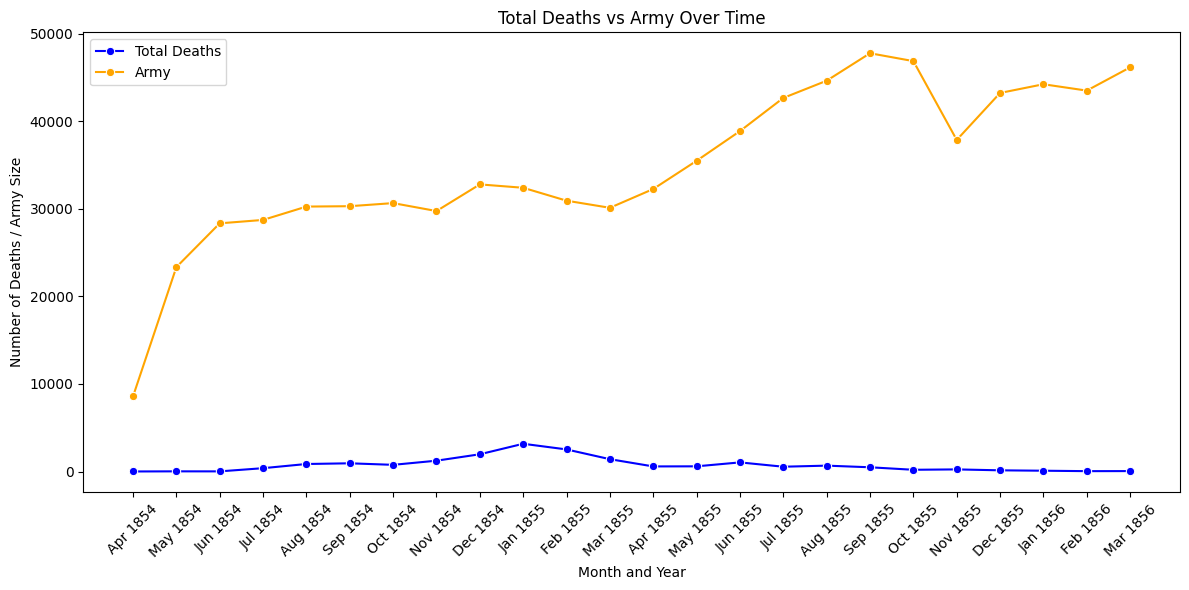

In [5]:
# line graph of army and total deaths
# inspecting the relationship between army size and total deaths over time
df['Total Deaths'] = df['Disease'] + df['Wounds'] + df['Other']
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month_Year', y='Total Deaths', marker='o', label='Total Deaths', color='blue')
sns.lineplot(data=df, x='Month_Year', y='Army', marker='o', label='Army', color='orange')
plt.xticks(rotation=45)
plt.title('Total Deaths vs Army Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Number of Deaths / Army Size')
plt.legend()
plt.tight_layout()
plt.show()

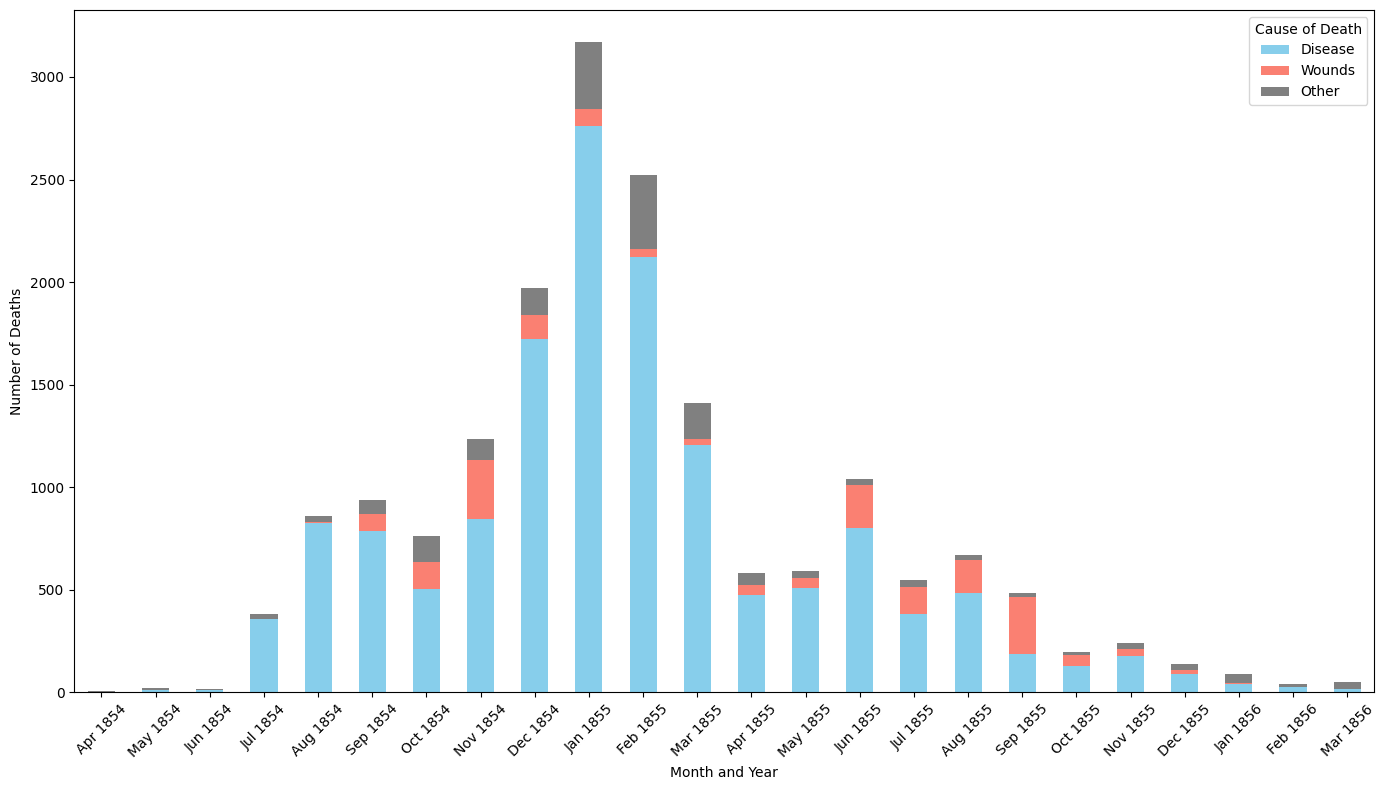

In [6]:
# adding a stacked bar chart and maintaining the same color scheme used by Nightingale

df.set_index('Month_Year')[['Disease', 'Wounds', 'Other']].plot(kind='bar', stacked=True, figsize=(14, 8),
                                                                 color=['skyblue', 'salmon', 'grey'])
plt.ylabel('Number of Deaths')
plt.xlabel('Month and Year')
plt.legend(title='Cause of Death')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

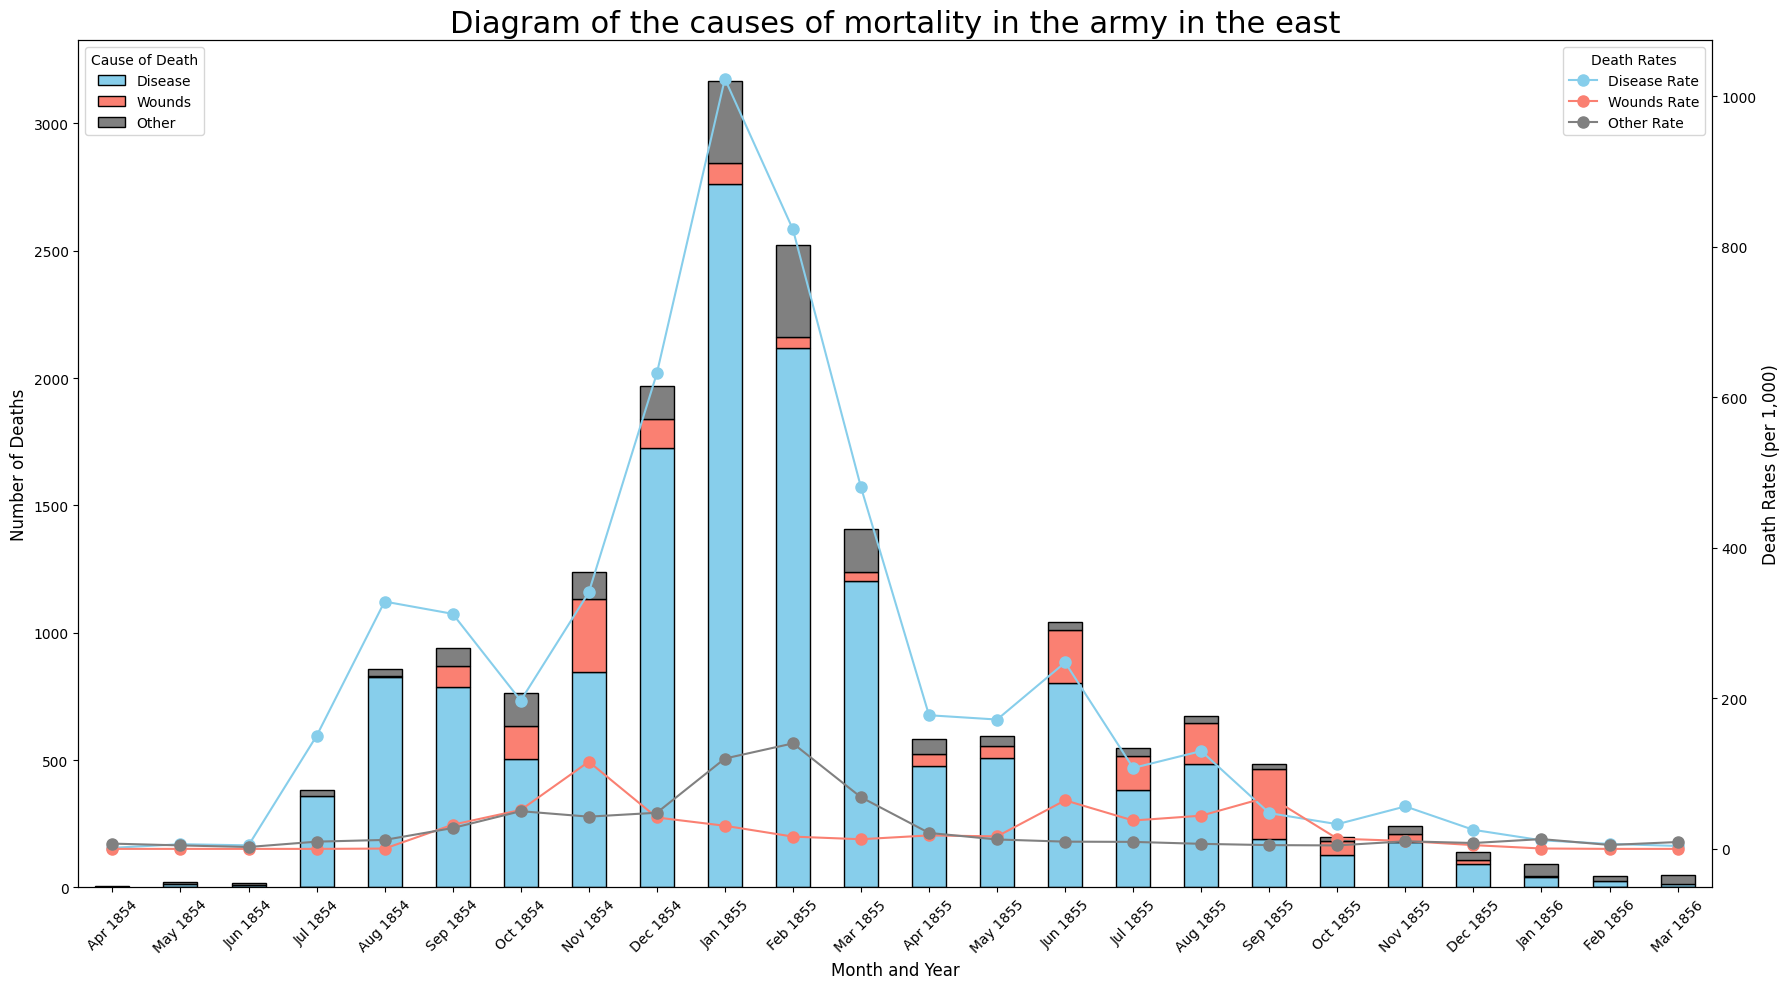

In [7]:
# Redesigned graphic of Nightingale's data using matplotlib
# adding a dual axis line plot for the death rates alonside the stacked bar chart
# creating fix and axes for the combined plot
fig, ax1 = plt.subplots(figsize=(18, 10))

# plot for the stacked bar chart using plot from pandas
df.set_index("Month_Year")[["Disease", "Wounds", "Other"]].plot(
    kind="bar",
    stacked=True,
    ax=ax1,
    color=["skyblue", "salmon", "grey"],
    edgecolor="black",
)
ax1.set_title('Diagram of the causes of mortality in the army in the east', fontsize=22)
ax1.set_ylabel('Number of Deaths', fontsize=12)
ax1.set_xlabel('Month and Year', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Cause of Death', loc='upper left')

# secondary axis for the death rates 
ax2 = ax1.twinx()
ax2.plot(df["Month_Year"],df["Disease.rate"],color="skyblue",marker="o",label="Disease Rate",markersize=8)
ax2.plot(df['Month_Year'], df['Wounds.rate'], color='salmon', marker='o', label='Wounds Rate',markersize=8)
ax2.plot(df['Month_Year'], df['Other.rate'], color='grey', marker='o', label='Other Rate',markersize=8)
ax2.set_ylabel('Death Rates (per 1,000)', fontsize=12)
ax2.legend(title='Death Rates', loc='upper right')


plt.tight_layout()
plt.show()

In [8]:
# Redesigned graphic of Nightingale's data using plotly 
# figure object for the combined plot
fig = go.Figure()

# Add stacked bar traces for the number of deaths
fig.add_trace(go.Bar(x=df['Month_Year'],y=df['Disease'],name='Disease',marker=dict(color='skyblue', line=dict(color='black', width=1)),yaxis='y1'))
fig.add_trace(go.Bar(x=df['Month_Year'],y=df['Wounds'],name='Wounds',marker=dict(color='salmon', line=dict(color='black', width=1)),yaxis='y1'))
fig.add_trace(go.Bar(x=df['Month_Year'],y=df['Other'],name='Other',marker=dict(color='darkgrey', line=dict(color='black', width=1)),yaxis='y1'))

# Add line traces for the death rates
fig.add_trace(go.Scatter(x=df['Month_Year'],y=df['Disease.rate'],mode='lines+markers',name='Disease Rate',
                         line=dict(color='skyblue'),marker=dict(color='skyblue'),yaxis='y2' ))

fig.add_trace(go.Scatter(x=df['Month_Year'],y=df['Wounds.rate'],mode='lines+markers',name='Wounds Rate',
                         line=dict(color='salmon'),marker=dict(color='salmon'),yaxis='y2' ))

fig.add_trace(go.Scatter(x=df['Month_Year'],y=df['Other.rate'],mode='lines+markers',name='Other Rate',
                         line=dict(color='darkgrey'),marker=dict(color='darkgrey'),yaxis='y2' ))



fig.update_layout(
title="Diagram of the causes of mortality in the army in the east",
xaxis=dict(title="Month and Year", tickangle=45),
yaxis=dict(title=dict(text="Number of Deaths", font=dict(color="black")), side="left"),
yaxis2=dict(title=dict(text="Death Rates (per 1000)", font=dict(color="black")),overlaying="y",side="right",),
    barmode="stack",legend=dict(title="Legend",orientation="h", y=-0.2, x=0.5, xanchor="center"),
    template="plotly_white",height=700,width=1200)




# Notes & summary of redesign

- I initially tried to redesign the graphic using a polar chart to show the data for all years in a single chart, but its hard to interpret and compare values across months in this format. Also the orgiginal graphic was split into two polar charts which makes sense because its hard to fit all the data into a single polar chart without it looking cluttered.

- The issue with using a polar char is that it is hard to compare values across months that are across three years. This was the primary reason for switching to a stacked bar chart with a dual y axis. This also makes it easier to follow the trends over time. From a visual standpoint, the stacked bar chart is easier to interpret and compare values across months.

- I added a graph to show the army size over time to provide context for the death rates, which was missing in the original graphic. The size of the army can significantly impact death rates, so including this information helps viewers understand the data better.